In [10]:
import inspect
import json
import logging
import math
import re
import os
from typing import Dict, List

import numpy as np
import pandas as pd
import psycopg2
import tiktoken
from openai import AzureOpenAI
from sqlalchemy import text
from sqlalchemy.orm import Session
from dotenv import load_dotenv

load_dotenv()


True

In [11]:
def get_embedding(input_data: List[str], model_name: str, dimension: int):
    """
    Generates embeddings for the given text using the specified language model.

    Args:
        input_data (List[str]): List of text inputs to generate embeddings for.
        model_name (str): Name of the language model.
        config (Dict): Configuration dictionary.
        dimension (int): Dimensions of the embeddings output.

    Returns:
        List[List[float]]: List of embeddings generated for the input text.
    """
    client = AzureOpenAI(
        api_key=os.getenv("OPENAI_API_KEY"),
        api_version="2023-05-15",
        azure_endpoint=os.getenv("OPENAI_ENDPOINT"),
    )
    response = client.embeddings.create(
        input=input_data, model=model_name, dimensions=dimension
    ).model_dump()
    return [obj["embedding"] for obj in response["data"]]

In [12]:
coordinates = get_embedding(['Man bites dog','dog bites man'], model_name='text-embedding-3-small', dimension=2)

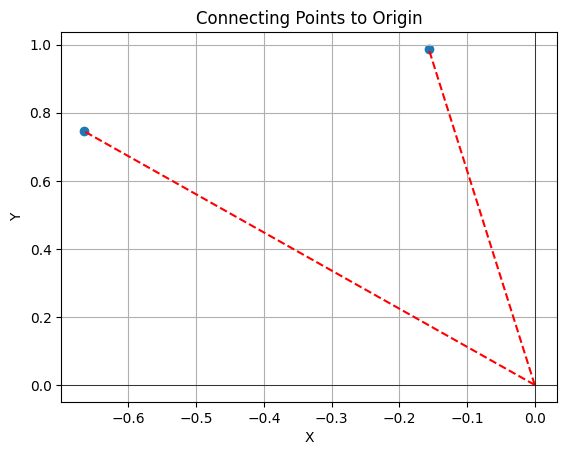

In [13]:
import matplotlib.pyplot as plt

# Coordinates
# coordinates = [[0.9776125550270081, -0.21041329205036163], [0.906786322593689, 0.4215904176235199]]

# Extract x and y coordinates
x = [point[0] for point in coordinates]
y = [point[1] for point in coordinates]

# Plot points
plt.scatter(x, y)

# Plot lines from each point to the origin (0,0)
for point in coordinates:
    plt.plot([0, point[0]], [0, point[1]], 'r--')

plt.title('Connecting Points to Origin')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.show()
